In [1]:
import numpy as np
import pandas as pd

In [2]:
link = 'dft_traffic_counts_aadf.csv'
raw_df = pd.read_csv(link)

In [3]:
top_traf_2000 = raw_df.iloc[np.where(np.array(raw_df['year']) == 2000)[0]].nlargest(n=10, columns=['all_motor_vehicles'])
top_cp_2000 = list(top_traf_2000['count_point_id'])

In [4]:
years = list(np.linspace(2000, 2020, 21))
years = [int(a) for a in years]
amv_trend = {}
amv_trend['Years'] = years
for i in top_cp_2000:
    listy = []
    #print(i)
    for j in years:
        #print(j)
        j_data = raw_df.iloc[np.where(np.array(raw_df['year']) == j)[0]]
        if i in list(j_data['count_point_id']):
            i_in_j = j_data.iloc[np.where(np.array(j_data['count_point_id']) == i)[0]]
            val = i_in_j.iloc[0, 32]
        else:
            val = np.nan
        listy.append(val)
    amv_trend[i] = listy

R_ana = pd.DataFrame.from_dict(amv_trend)

<AxesSubplot:xlabel='Years'>

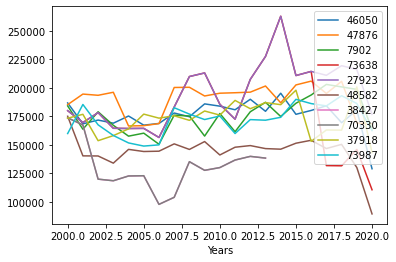

In [5]:
R_ana.plot(x='Years', y=top_cp_2000, kind = 'line')